In [1]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"

In [1]:
import pandas as pd

dataset = pd.read_parquet('Metal_all_20180116.snappy.parquet', engine='pyarrow')

In [3]:
proteinSet = dataset.as_matrix(columns=None)

# sequence set
sequenceSet = proteinSet[:,[4]]

# fingerprint set
fingerPrintSet = proteinSet[:,[2]]

In [4]:
# helper methods for extracting sequence set and fingerprint set for a specific ligandID
# return: 1: fingerPrintSet for a ligandID; 2: sequenceSet for a ligandID

def extractOneLigandID(id):
    extractedSet = proteinSet[proteinSet[:,1]==id]
    return extractedSet[:,[2]].tolist(), extractedSet[:,[4]].tolist()
    

In [5]:
#Test of Zn1 to remove

fpLs_zn1, seqLs_zn1 = extractOneLigandID("ZN1")

print(len(seqLs_zn1))


0


In [6]:
metalSet = proteinSet[:,[1]]

In [7]:
metalDict = {}
for i in metalSet:
    for j in i:
            metalDict[j] = 1
print(metalDict)

{'MN': 1, 'CA': 1, 'MG': 1, 'ZN': 1, 'CU': 1, 'FE': 1, 'CO': 1, 'FE2': 1, 'NI': 1, 'CU1': 1, '3CO': 1, '3NI': 1, 'MN3': 1}


In [2]:
dataset

,structureChainId,ligandId,fingerprint,groupNumber,sequence,interactingChains,clusterNumber30,clusterNumber40,clusterNumber50,clusterNumber70,clusterNumber90,clusterNumber95,clusterNumber100
0,1A0O.A,MN,"[11, 55, 57]","[13, 57, 59]",ADKELKFLVVDDFSTMRRIVRNLLKELGFNNVEEAEDGVDALNKLQ...,1,115.0,386.0,404.0,371.0,325.0,313.0,1621.0
1,1A25.A,CA,"[107, 110, 111, 113]","[248, 251, 252, 254]",GSPGISGGGGGILDSMERRGRIYIQAHIDREVLIVVVRDAKNLVPM...,2,632.0,5212.0,24455.0,28660.0,32138.0,33630.0,44596.0
2,1A25.A,CA,"[45, 46, 105, 107, 113]","[186, 187, 246, 248, 254]",GSPGISGGGGGILDSMERRGRIYIQAHIDREVLIVVVRDAKNLVPM...,2,632.0,5212.0,24455.0,28660.0,32138.0,33630.0,44596.0
3,1A25.A,CA,"[46, 52, 105, 106, 107]","[187, 193, 246, 247, 248]",GSPGISGGGGGILDSMERRGRIYIQAHIDREVLIVVVRDAKNLVPM...,1,632.0,5212.0,24455.0,28660.0,32138.0,33630.0,44596.0
4,1AJD.B,MG,"[50, 154, 321]","[51, 155, 322]",TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,1,584.0,592.0,555.0,515.0,485.0,444.0,8044.0
5,1AJD.B,ZN,"[50, 101, 368, 369]","[51, 102, 369, 370]",TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,1,584.0,592.0,555.0,515.0,485.0,444.0,8044.0
6,1AJD.B,ZN,"[326, 330, 411]","[327, 331, 412]",TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,1,584.0,592.0,555.0,515.0,485.0,444.0,8044.0
7,1ALN.A,ZN,"[101, 128, 131]","[102, 129, 132]",MHPRFQTAFAQLADNLQSALEPILADKYFPALLTGEQVSSLKSATG...,1,4526.0,4989.0,13948.0,15950.0,17149.0,17499.0,19782.0
8,1AS6.C,CU,"[97, 138, 147, 152]","[95, 136, 145, 150]",QGAVRKATAAEIAALPRQKVELVDPPFVHAHSQVAEGGPKVVEFTM...,1,181.0,198.0,182.0,158.0,305.0,292.0,548.0
9,1AVM.B,FE,"[26, 74, 160, 164]","[27, 75, 161, 165]",AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,1,131.0,129.0,145.0,5796.0,5939.0,5934.0,5230.0


In [8]:
fpLs_zn, seqLs_zn = extractOneLigandID("ZN")

In [9]:
# credit: https://github.com/zygmuntz/classifying-text
# FOFE package for encoding protein sequences with variable lengths into fixed length

from fofePackage.fofe.fofe import FofeVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import numpy as np

In [10]:
# sequence list where each sequence is a list of symbols

seq_ls = []

for i in seqLs_zn:
    sb_ls = []
    for j in i[0]:
        sb_ls.append(j)
    seq_ls.append(sb_ls)

In [11]:
# eliminate X and U

def eliXAndU(sqls, fpls):
    print("size of sequence set before eliminating X and U: "+str(len(sqls)))
    sq_out = []
    fp_out = []
    for i in range(len(sqls)):
        invalidSeq = False
        for j in sqls[i]:
            if j =='X' or j == 'U':
                invalidSeq = True
                break
        if invalidSeq == False:
            sq_out.append(sqls[i])
            fp_out.append(fpls[i])
            
    print("size of sequence set after eliminating X and U: "+str(len(sq_out)))
    return sq_out, fp_out    

seq_ls_eli, fp_ls_eli = eliXAndU(seq_ls, fpLs_zn)
#seq_ls_eli, fp_ls_eli = seq_ls, fpLs_zn

size of sequence set before eliminating X and U: 23277
size of sequence set after eliminating X and U: 23233


In [12]:
# make a list that stores all lengths for all sequence to make a cut-off

length_ls = []

for i in seq_ls_eli:
    curLen = 0
    for j in i:
        curLen +=1
    
    length_ls.append(curLen)

In [13]:
# helper function to get a sub list of current sequence list and foot print list

def getSubList(sqls, fpls, cutoff):
    sq_out = []
    fp_out = []
    for i in range(len(sqls)):
        if len(sqls[i]) <= cutoff:
            sq_out.append(sqls[i])
            fp_out.append(fpls[i])
    
    return sq_out, fp_out


# sort length list to do a cut-off
length_ls.sort()
length_ls = np.array(length_ls)

stdLength = np.std(length_ls, dtype=np.float32)
meanLength = np.mean(length_ls, dtype=np.float32)

print("std: "+str(stdLength)+" mean: "+str(meanLength))


# do cut-off
seq_ls_cut, fp_ls_cut = getSubList(seq_ls_eli, fp_ls_eli, meanLength+2*stdLength)



# don't do cut-off
# seq_ls_cut = seq_ls
# fp_ls_cut = fpLs_zn

print("size of sequence set before cutoff: "+str(len(seq_ls_eli)))
print("size of sequence set after cutoff: "+str(len(seq_ls_cut)))

std: 200.986 mean: 306.67
size of sequence set before cutoff: 23233
size of sequence set after cutoff: 22207


In [14]:
# find the max length of sequences after cut off
maxLength = 0

for i in seq_ls_cut:
    curLen = 0
    for j in i:
        curLen +=1
    
    if curLen>maxLength:
        maxLength = curLen
print("maxLength after cutoff is: " + str(maxLength))

maxLength after cutoff is: 707


In [15]:
# a dict to find out what symbol types the sequences have
# Ignore X and U symbols
symbolDict = {}
for i in seq_ls_cut:
    for j in i:
            symbolDict[j] = 1
    

In [16]:
# vocabulary: a dictionary mapping symbols (amino acid) to indices

# raw_doc: list of all symbols
raw_doc = []

for key, _ in symbolDict.items():
    raw_doc.append(key)

    
# create the vocabulary dictionary
vocab_dict = {}
count = 0
for sb in raw_doc:
    vocab_dict[sb] = count
    count +=1

In [17]:
print(raw_doc)

['T', 'P', 'E', 'M', 'V', 'L', 'N', 'R', 'A', 'Q', 'G', 'D', 'I', 'S', 'K', 'Y', 'F', 'H', 'W', 'C']


In [18]:
alpha = 1 - 1e-3
#alpha = 0.4

fofe = FofeVectorizer(alpha)

In [35]:
# naive transform: slow and memory hungry, but is readable
features = fofe.naive_transform(seq_ls_cut, vocab_dict)
labels = fp_ls_cut[:]

In [36]:
# get reverse of sequences
seq_ls_cut_rev = []
for i in seq_ls_cut:
    seq_ls_cut_rev.append(list(reversed(i)))
features_rev = fofe.naive_transform(seq_ls_cut_rev, vocab_dict)

In [37]:
# normalize feature matrix by subtracting each value by mean/std
for i in range(len(features)):
    tmp_ls = np.array(features[i])
    tmp_std = np.std(tmp_ls, dtype=np.float32)
    tmp_mean = np.mean(tmp_ls, dtype=np.float32)
    for j in range(len(tmp_ls)):
        features[i][j]=tmp_ls[j]-tmp_mean/tmp_std

In [38]:
# normalize feature matrix by subtracting each value by mean/std
for i in range(len(features_rev)):
    tmp_ls = np.array(features_rev[i])
    tmp_std = np.std(tmp_ls, dtype=np.float32)
    tmp_mean = np.mean(tmp_ls, dtype=np.float32)
    for j in range(len(tmp_ls)):
        features_rev[i][j]=tmp_ls[j]-tmp_mean/tmp_std

In [39]:
# Combine features and features_rev
features_new = []
for i in range(len(features)):
    features_new.append(np.concatenate((features[i],features_rev[i])))

In [40]:
features = features_new
print(features_new[0])

[ 30.44029478  15.10533553  18.75527186   5.11926158  17.76597224
  30.0497368   14.74447629   8.47713323  49.72063533  16.11374339
  34.73948151  20.30049     11.03765764  16.20917151  21.11548057
   7.29747323   5.12521654   6.90013945   0.82685778   1.74566868
  31.0365004   15.74805486  18.50306355   4.83281241  16.28730546
  29.84185136  14.46583821   9.50927094  50.45014743  14.72396218
  36.41533962  20.30012925  11.798737    16.229569    20.96942071
   7.46054573   4.76793777   6.22649949   0.98344232   1.66801846]


In [41]:

train_features = features[:int(len(features)*3/4)]
train_labels = labels[:int(len(labels)*3/4)]

test_features = features[int(len(features)*3/4):]
test_labels = labels[int(len(labels)*3/4):]

train_seq_ls_cut = seq_ls_cut[:int(len(seq_ls_cut)*3/4)]
test_seq_ls_cut = seq_ls_cut[int(len(seq_ls_cut)*3/4):]

train_fp_ls_cut = fp_ls_cut[:int(len(fp_ls_cut)*3/4)]
test_fp_ls_cut = fp_ls_cut[int(len(fp_ls_cut)*3/4):]


In [42]:
#adding chanel dimension to input matrix and make it 3d

for i in train_features:
    i = [i]

for i in train_labels:
    i = [i]
    
for i in test_features:
    i = [i]
    
for i in test_labels:
    i = [i]
    

In [43]:
print(len(train_features))

16655


In [44]:
# BUILD of a simple CNN architecture
import time
import matplotlib.pyplot as plt
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Convolution1D, MaxPooling1D
from keras.layers import Activation, Flatten, Dense, Dropout, Reshape
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils



Using TensorFlow backend.


In [45]:
import numpy as np
import keras
#x_train = np.random.random((1000, 20))
#y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
#x_test = np.random.random((100, 20))
#y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

train_features = np.array(train_features)
test_features = np.array(test_features)

#prep of labels
#create zero matrix of all zeros with maxLength columns
train_l = np.zeros((len(train_labels),maxLength))
test_l = np.zeros((len(test_labels),maxLength))


# for i in range(len(train_l)):
#     for j in range(len(train_seq_ls_cut[i])):
#         train_l[i][j] = 0.1
        
# for i in range(len(test_l)):
#     for j in range(len(train_seq_ls_cut[i])):
#         test_l[i][j] = 0.1

        
for i in range(len(train_labels)):
    for j in train_labels[i][0]:
        train_l[i][j] = 1
        
for i in range(len(test_labels)):
    for j in test_labels[i][0]:
        test_l[i][j] = 1     



train_l = np.array(train_l)
test_l = np.array(test_l)


In [46]:
print(len(seq_ls_cut))
print(len(train_features))

22207
16655


In [47]:
model = Sequential()


#model.add(Dense(maxLength, input_dim=20))
model.add(Reshape((4,10,1), input_shape=(40,)))
model.add(Convolution2D(48, 2, 2, border_mode='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Convolution2D(96, 2, 2))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 1)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(maxLength, activation='softmax'))
          
          
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_info = model.fit(train_features, train_l, batch_size=128, epochs=200, validation_data=(test_features, test_l),verbose=0)

end = time.time()

print("Model took %0.2f seconds to train"%(end - start))

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (2, 2), padding="same")`
  


Model took 822.71 seconds to train


In [48]:
# helper function to find the ranking of finger print points in prediction
def getRanking(sequence_index, label_set, pred):
    # build a list of tuples based on the prediction list
    tuple_ls = []
    for i in range(len(pred[sequence_index])):
        tuple_ls.append((i, pred[sequence_index][i]))
    
    tuple_ls = sorted(tuple_ls, key=lambda x: x[1], reverse=True)
    
    output_ls = []
    cur_fp_ls = label_set[sequence_index][0]
    
    #print(cur_fp_ls)
    for i in range(len(cur_fp_ls)):
        
        cur_index = cur_fp_ls[i]
        for j in range(len(tuple_ls)):
            if tuple_ls[j][0]==cur_index:
                output_ls.append(j+1)
                #print("Ranking for site "+str(cur_index)+" is: "+str(j+1))
                
    return output_ls


In [49]:
prediction = model.predict(test_features)

print(prediction[0])

[  1.29497857e-10   1.01183737e-16   4.93513216e-13   4.10120896e-11
   2.40581996e-13   7.94117625e-08   7.18848158e-13   1.90560954e-08
   8.64919087e-08   1.81106782e-10   1.10685676e-06   2.42245096e-06
   1.02078979e-11   8.39385120e-06   4.46249615e-08   8.72681812e-06
   1.29712985e-09   2.05438437e-06   1.52430513e-09   2.17363905e-09
   2.15426219e-08   5.22858308e-08   3.04273107e-10   9.14677312e-09
   2.66706657e-09   4.79862183e-06   2.92523666e-12   1.78737636e-09
   6.65281927e-11   3.41955406e-08   1.81791960e-11   7.69136884e-14
   8.55820133e-07   9.26179244e-10   1.87661612e-07   4.29473808e-08
   7.39015391e-08   2.20684502e-08   3.18114985e-06   5.01314616e-07
   1.67598102e-09   3.11551140e-08   6.53209645e-06   5.33519895e-11
   1.21775497e-06   2.44706455e-09   2.01026651e-07   2.34341343e-07
   1.26941675e-12   5.04319360e-07   6.86347290e-09   7.11044521e-08
   2.34912134e-09   1.46007784e-09   1.54066573e-08   2.31229606e-07
   1.43851386e-09   9.69974252e-08

In [50]:
import matplotlib.pyplot as plt

# get ranking plot for test set

rank_x = []
rank_y = []

# Calculate True Positive Rate
hit = 0
total = 0

for i in range(len(test_labels)):
    tmp_out = getRanking(i, test_labels, prediction)
    
    for j in tmp_out:
        if j <= len(tmp_out):
            hit+=1
        total+=1
    
    for j in range(len(tmp_out)):
        rank_x.append(i)
        rank_y.append(tmp_out[j])

print("total: "+str(total)+" hits: "+str(hit)+" misses: "+str(total-hit))
print("hit rate: "+str(hit/total))

total: 20029 hits: 13105 misses: 6924
hit rate: 0.6543012631684059


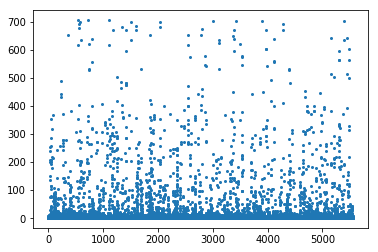

In [51]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(rank_x,rank_y,s=4)

In [52]:
print(len(prediction))

5552


In [53]:
index_ls = []
tmp_count = 0
for i in range(maxLength):
    index_ls.append(tmp_count)
    tmp_count+=1

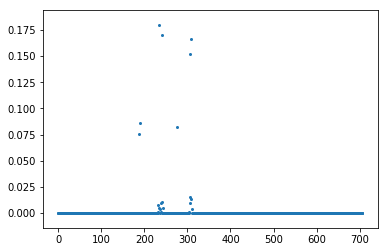

In [54]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(index_ls,prediction[0],s=4)

In [ ]:
print(test_fp_ls_cut[0])
print(len(test_seq_ls_cut[0]))

In [ ]:
print(np.histogram(np.array(prediction[0])))

In [ ]:
print(model_info.history)